In [1]:
# --- Installation of required libraries (run this cell if you don't have them) ---
# !pip install numpy pandas matplotlib seaborn scikit-learn nltk umap-learn

# --- Core Libraries ---
import numpy as np
import pandas as pd
import re
import nltk

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preprocessing & Feature Engineering ---
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# --- Dimensionality Reduction ---
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap  # Correct import for UMAP

# --- Modeling ---
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

# --- Evaluation ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# --- NLTK Downloads (only needs to be run once) ---
# Download necessary NLTK data
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')
try:
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    nltk.download('wordnet')

print("Setup Complete!")

ModuleNotFoundError: No module named 'nltk'

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('IMDB Dataset.csv')
except FileNotFoundError:
    print("Error: 'IMDB Dataset.csv' not found. Please download it from Kaggle and place it in the correct directory.")
    # You might need to adjust the path if the file is elsewhere, e.g., 'path/to/your/file/IMDB Dataset.csv'
    df = None

if df is not None:
    # Display the first few rows of the dataframe
    print("Dataset Head:")
    print(df.head())

    # Display basic information about the dataset
    print("\nDataset Info:")
    df.info()

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Check the distribution of sentiments
    print("\nSentiment Distribution:")
    print(df['sentiment'].value_counts())

Dataset Head:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

Missing Values:
review       0
sentiment    0
dtype: int64

Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
# Task 1 
if df is not None:
    # Calculate the number of words in each review
    # We use a simple split on whitespace for this initial EDA step
    df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

    # Calculate the average review length
    average_length = df['word_count'].mean()
    print(f"The average review length is: {average_length:.2f} words")

The average review length is: 231.16 words


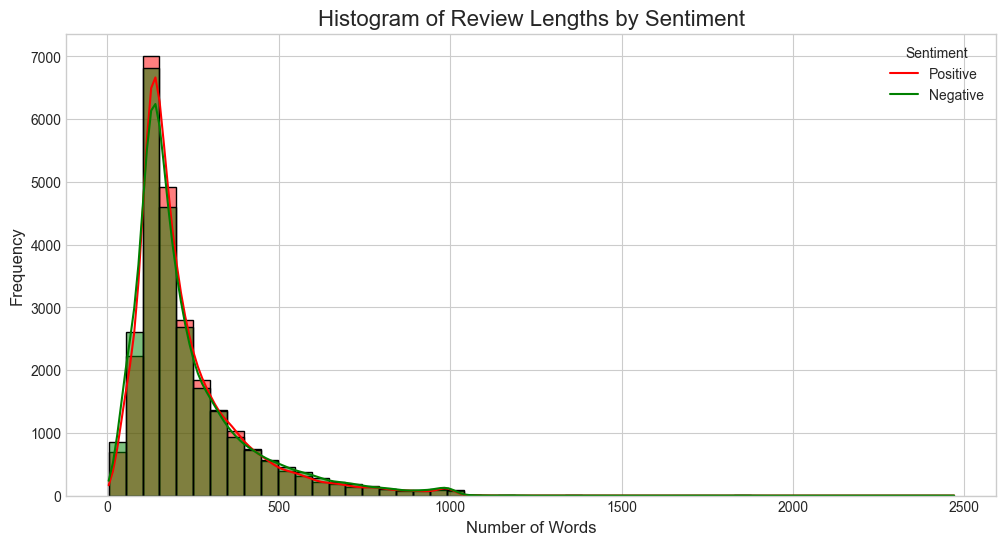

In [ ]:
if df is not None:
    # Set up the plot style
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 6))

    # Create a histogram of word counts, separated by sentiment
    sns.histplot(data=df, x='word_count', hue='sentiment', bins=50, kde=True, palette={'positive': 'green', 'negative': 'red'})

    # Add titles and labels
    plt.title('Histogram of Review Lengths by Sentiment', fontsize=16)
    plt.xlabel('Number of Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
    plt.show()

C:\Users\iankw\AppData\Local\Temp\ipykernel_956\131326380.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')


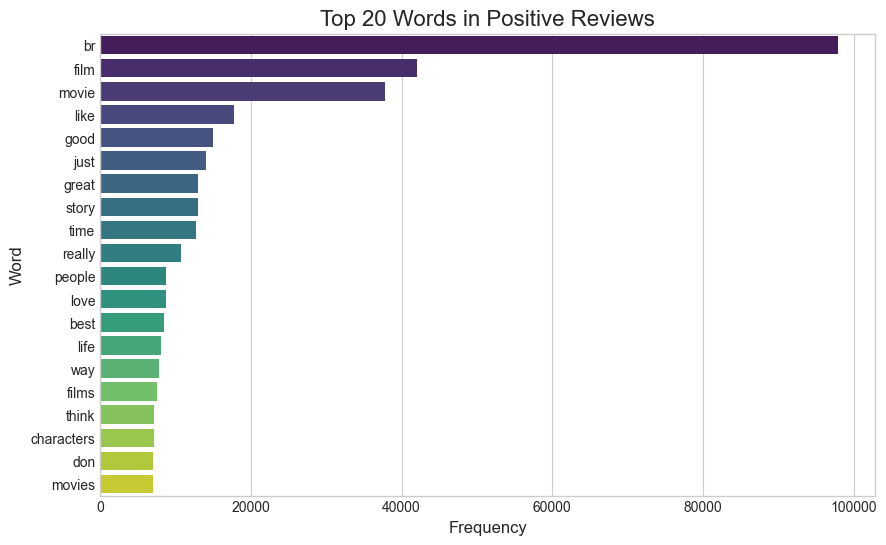

C:\Users\iankw\AppData\Local\Temp\ipykernel_956\131326380.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')


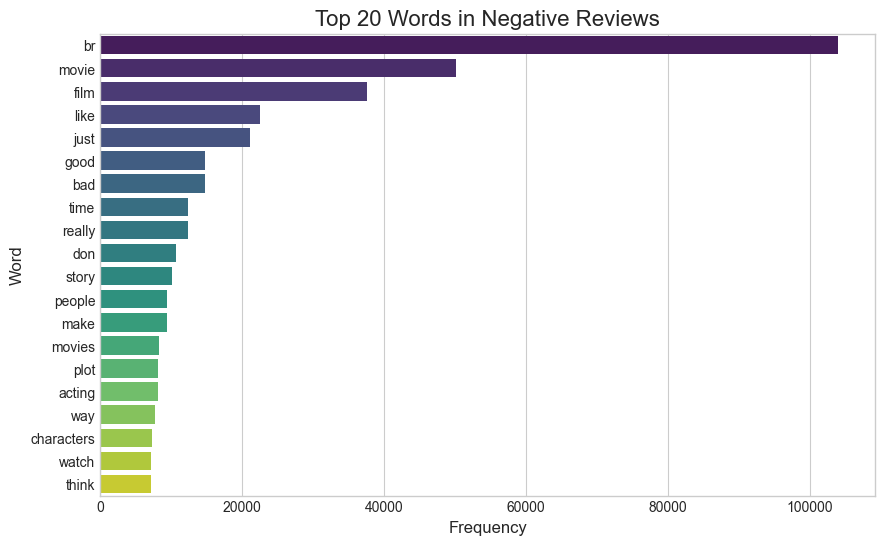

In [ ]:
def plot_top_words(text, n_words=20, title="Top Words"):
    """
    This function takes a body of text, vectorizes it, and plots the top N most frequent words.
    """
    # Use CountVectorizer to get word counts, removing English stop words
    vectorizer = CountVectorizer(stop_words='english', max_features=n_words)
    word_counts = vectorizer.fit_transform(text)
    
    # Sum the counts of each word across all documents
    sum_words = word_counts.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a DataFrame for plotting
    top_words_df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.show()

if df is not None:
    # Separate reviews by sentiment
    positive_reviews = df[df['sentiment'] == 'positive']['review']
    negative_reviews = df[df['sentiment'] == 'negative']['review']

    # Plot top words for positive reviews
    plot_top_words(positive_reviews, n_words=20, title="Top 20 Words in Positive Reviews")

    # Plot top words for negative reviews
    plot_top_words(negative_reviews, n_words=20, title="Top 20 Words in Negative Reviews")

C:\Users\iankw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


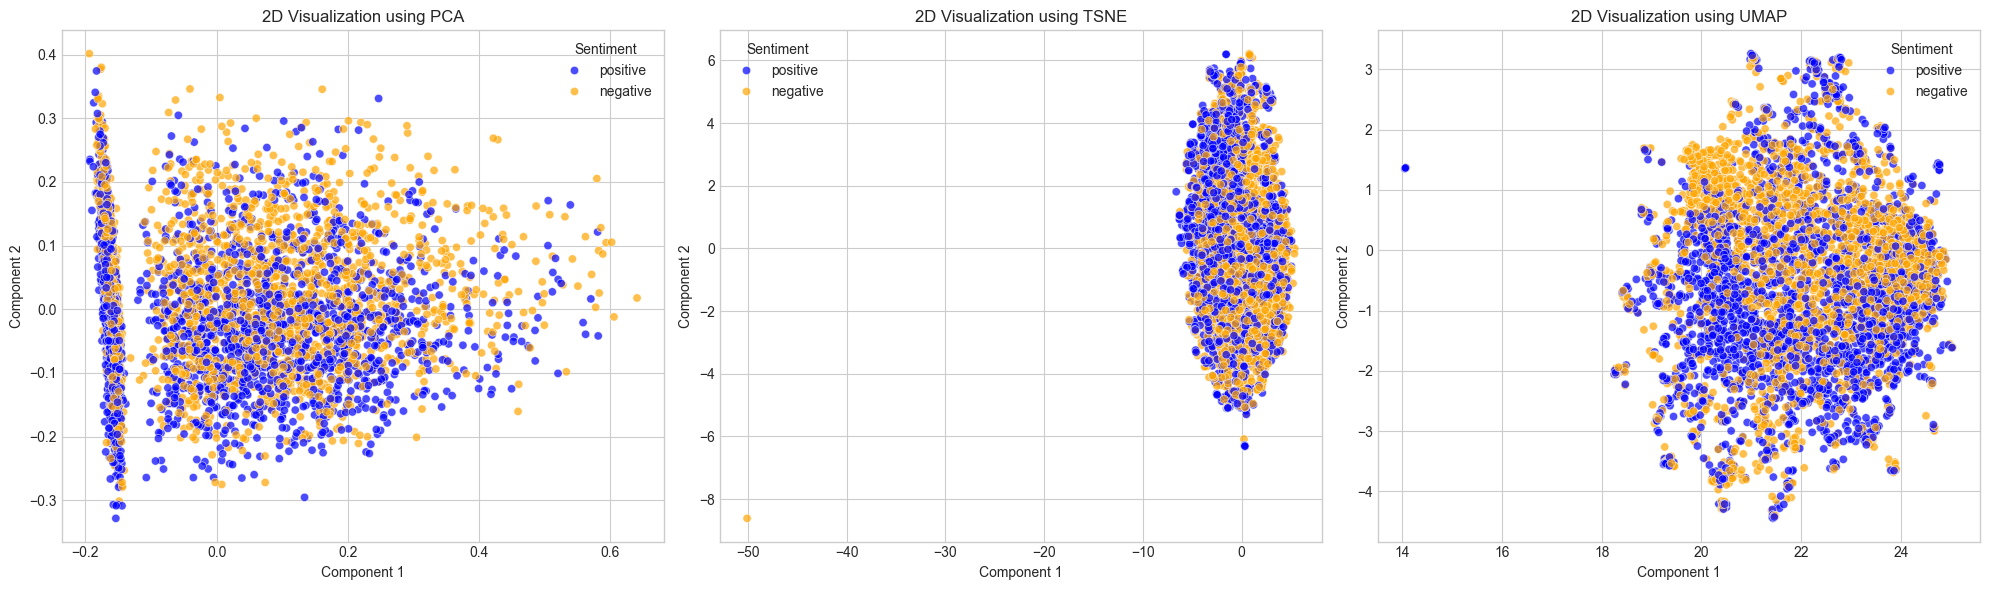

In [ ]:
def plot_dim_reduction(vectors, labels, method_name):
    """
    Reduces dimensions of vectors and creates a scatter plot.
    """
    # Reduce dimensions
    reduced_vectors = method_name.fit_transform(vectors)
    
    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(reduced_vectors, columns=['dim1', 'dim2'])
    plot_df['sentiment'] = labels
    
    # Plot
    sns.scatterplot(data=plot_df, x='dim1', y='dim2', hue='sentiment', palette={'positive': 'blue', 'negative': 'orange'}, alpha=0.7)
    plt.title(f'2D Visualization using {type(method_name).__name__}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Sentiment')

if df is not None:
    # Take a smaller sample for faster processing (e.g., 5000 reviews)
    sample_df = df.sample(n=5000, random_state=42)

    # Create TF-IDF vectors for the sample
    tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
    sample_vectors = tfidf.fit_transform(sample_df['review']).toarray()
    sample_labels = sample_df['sentiment'].values

    # Initialize dimensionality reduction methods
    pca = PCA(n_components=2, random_state=42)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)  # Fixed: n_iter -> max_iter
    umap_reducer = umap.UMAP(n_components=2, random_state=42)  # Correct UMAP usage

    # Create plots
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 3, 1)
    plot_dim_reduction(sample_vectors, sample_labels, pca)
    
    plt.subplot(1, 3, 2)
    plot_dim_reduction(sample_vectors, sample_labels, tsne)
    
    plt.subplot(1, 3, 3)
    plot_dim_reduction(sample_vectors, sample_labels, umap_reducer)
    
    plt.tight_layout()
    plt.show()

In [ ]:
#Text preprocessing function 
# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Cleans and preprocesses a single text document.
    """
    # 1. Remove HTML tags using regex
    text = re.sub(r'<.*?>', '', text)
    
    # 2. Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    
    # 3. Tokenize the text
    words = text.split()
    
    # 4. Remove stop words and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # 5. Join words back into a single string
    return " ".join(cleaned_words)

if df is not None:
    # Apply the preprocessing function to the 'review' column
    # This might take a few minutes to run on the full 50k dataset
    print("Preprocessing text... This may take a moment.")
    df['cleaned_review'] = df['review'].apply(preprocess_text)
    print("Preprocessing complete.")

    # Display the original vs. cleaned review for one example
    print("\n--- Example of Preprocessing ---")
    print("Original Review:")
    print(df['review'].iloc[5])
    print("\nCleaned Review:")
    print(df['cleaned_review'].iloc[5])

Preprocessing text... This may take a moment.


In [ ]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

if df is not None:
    # 1. Create sentiment lexicon score (VADER)
    # We apply this to the ORIGINAL review text, as VADER is trained on raw text with punctuation.
    df['vader_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # 2. Create feature for the number of exclamation marks
    df['exclamation_marks'] = df['review'].apply(lambda x: x.count('!'))

    print("Engineered features created:")
    print(df[['review', 'vader_score', 'exclamation_marks']].head())

In [ ]:
if df is not None:
    # Define features (X) and target (y)
    # The main text feature is the 'cleaned_review'
    X_text = df['cleaned_review']
    
    # Our engineered features - scale VADER scores to be non-negative for MultinomialNB
    # VADER scores range from -1 to +1, so we add 1 to make them 0 to 2
    df_engineered = df[['vader_score', 'exclamation_marks']].copy()
    df_engineered['vader_score'] = df_engineered['vader_score'] + 1  # Shift to 0-2 range
    X_engineered = df_engineered.values
    
    y = df['sentiment']

    # Encode the target labels ('positive' -> 1, 'negative' -> 0)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and testing sets (80% train, 20% test)
    X_text_train, X_text_test, X_engineered_train, X_engineered_test, y_train, y_test = train_test_split(
        X_text, X_engineered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    print(f"Training set shape: {X_text_train.shape[0]} samples")
    print(f"Test set shape: {X_text_test.shape[0]} samples")
    print(f"VADER score range after scaling: {X_engineered[:, 0].min():.3f} to {X_engineered[:, 0].max():.3f}")

In [ ]:
# Initialize the TF-IDF Vectorizer
# We set a max_features limit to keep the feature space manageable.
# 10,000 is a good starting point.
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit the vectorizer on the TRAINING data and transform it
X_tfidf_train = tfidf_vectorizer.fit_transform(X_text_train)

# Transform the TEST data using the same fitted vectorizer
X_tfidf_test = tfidf_vectorizer.transform(X_text_test)

print("TF-IDF Vectorization Complete.")
print(f"Shape of TF-IDF training matrix: {X_tfidf_train.shape}")
print(f"Shape of TF-IDF test matrix: {X_tfidf_test.shape}")

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model", feature_set_name="Features"):
    """
    Trains a model and evaluates it, returning the trained model and predictions.
    """
    print(f"Training {model_name} on {feature_set_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate ROC-AUC (requires probability scores)
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except:
        roc_auc = "N/A (no predict_proba method)"
    
    # Print results
    print(f"\n--- {model_name} Results ({feature_set_name}) ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc}")
    
    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    
    return model, y_pred

In [ ]:
from scipy.sparse import hstack

# Combine the TF-IDF features with the engineered features
# This is our 'full feature' set
X_train_full = hstack([X_tfidf_train, X_engineered_train])
X_test_full = hstack([X_tfidf_test, X_engineered_test])

print("Combined Feature Sets (Full) Created.")
print(f"Shape of full training feature matrix: {X_train_full.shape}")
print(f"Shape of full test feature matrix: {X_test_full.shape}")

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# We want to select the best 3000 features from the original TF-IDF vectors
k_best_features = 3000
chi2_selector = SelectKBest(chi2, k=k_best_features)

# Find the best features on the TRAINING data
X_tfidf_train_reduced = chi2_selector.fit_transform(X_tfidf_train, y_train)

# Transform the TEST data to keep only those best features
X_tfidf_test_reduced = chi2_selector.transform(X_tfidf_test)

print("Chi-Square Feature Reduction Complete.")
print(f"Shape of reduced TF-IDF training matrix: {X_tfidf_train_reduced.shape}")

# Now, combine the REDUCED TF-IDF features with the engineered features
# This is our 'reduced feature' set
X_train_reduced = hstack([X_tfidf_train_reduced, X_engineered_train])
X_test_reduced = hstack([X_tfidf_test_reduced, X_engineered_test])

print("\nCombined Feature Sets (Reduced) Created.")
print(f"Shape of reduced training feature matrix: {X_train_reduced.shape}")

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# We want to select the best 3000 features from the original TF-IDF vectors
k_best_features = 3000
chi2_selector = SelectKBest(chi2, k=k_best_features)

# Find the best features on the TRAINING data
X_tfidf_train_reduced = chi2_selector.fit_transform(X_tfidf_train, y_train)

# Transform the TEST data to keep only those best features
X_tfidf_test_reduced = chi2_selector.transform(X_tfidf_test)

print("Chi-Square Feature Reduction Complete.")
print(f"Shape of reduced TF-IDF training matrix: {X_tfidf_train_reduced.shape}")

# Now, combine the REDUCED TF-IDF features with the engineered features
# This is our 'reduced feature' set
X_train_reduced = hstack([X_tfidf_train_reduced, X_engineered_train])
X_test_reduced = hstack([X_tfidf_test_reduced, X_engineered_test])

print("\nCombined Feature Sets (Reduced) Created.")
print(f"Shape of reduced training feature matrix: {X_train_reduced.shape}")

In [ ]:
# Initialize the Naïve Bayes model
nb_model = MultinomialNB()

# --- Train and evaluate on the FULL feature set ---
nb_full_model, nb_full_preds = train_and_evaluate_model(
    nb_model, X_train_full, y_train, X_test_full, y_test,
    model_name="Naïve Bayes", feature_set_name="Full Features (10k + 2)"
)

print("\n" + "="*50 + "\n")

# --- Train and evaluate on the REDUCED feature set ---
# We re-initialize the model to ensure it's a fresh training run
nb_model_reduced = MultinomialNB()
nb_reduced_model, nb_reduced_preds = train_and_evaluate_model(
    nb_model_reduced, X_train_reduced, y_train, X_test_reduced, y_test,
    model_name="Naïve Bayes", feature_set_name="Reduced Features (3k + 2)"
)

In [ ]:
# Initialize the Logistic Regression model
# We use 'saga' solver which is good for large datasets, and increase max_iter.
lr_model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)

# --- Train and evaluate on the FULL feature set ---
lr_full_model, lr_full_preds = train_and_evaluate_model(
    lr_model, X_train_full, y_train, X_test_full, y_test,
    model_name="Logistic Regression", feature_set_name="Full Features (10k + 2)"
)

print("\n" + "="*50 + "\n")

# --- Train and evaluate on the REDUCED feature set ---
lr_model_reduced = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
lr_reduced_model, lr_reduced_preds = train_and_evaluate_model(
    lr_model_reduced, X_train_reduced, y_train, X_test_reduced, y_test,
    model_name="Logistic Regression", feature_set_name="Reduced Features (3k + 2)"
)

In [ ]:
# Ultra-fast version - Replace SVM with faster algorithms
estimators_fast = [
    ('nb', MultinomialNB()),
    ('lr1', LogisticRegression(solver='liblinear', random_state=42, max_iter=300)),
    ('lr2', LogisticRegression(solver='saga', random_state=43, max_iter=300))  # Different solver for diversity
]

# Simpler meta-classifier
final_estimator_fast = LogisticRegression(solver='liblinear', max_iter=200)

# Fastest stacking configuration
stacking_model_fast = StackingClassifier(
    estimators=estimators_fast,
    final_estimator=final_estimator_fast,
    cv=2,
    n_jobs=-1
)

# Train only on reduced feature set for maximum speed
stacking_fast_model, stacking_fast_preds = train_and_evaluate_model(
    stacking_model_fast, X_train_reduced, y_train, X_test_reduced, y_test,
    model_name="Fast Stacking Ensemble", feature_set_name="Reduced Features (3k + 2)"
)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name=""):
    """
    Generates and plots a confusion matrix.
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.ylabel('Actual Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()

# Let's visualize the confusion matrix for our best-performing simple model:
# Logistic Regression on the full feature set.
plot_confusion_matrix(y_test, lr_full_preds, model_name="Logistic Regression (Full Features)")

# You can also uncomment the line below to see the matrix for the ensemble model
# plot_confusion_matrix(y_test, stacking_full_preds, model_name="Stacking Ensemble (Full Features)")

In [ ]:
# First, we need to get the original text of the test set reviews.
# We can use the index from our train_test_split.
X_text_test_df = df.loc[X_text_test.index]

# Create a DataFrame for analysis
error_df = X_text_test_df.copy()
error_df['actual_sentiment'] = label_encoder.inverse_transform(y_test)
error_df['predicted_sentiment'] = label_encoder.inverse_transform(lr_full_preds)

# Filter for only the misclassified reviews
misclassified_reviews = error_df[error_df['actual_sentiment'] != error_df['predicted_sentiment']]

print(f"Total misclassified reviews: {len(misclassified_reviews)}")
print("Displaying some misclassified reviews:\n")

# --- Function to display reviews nicely ---
def display_misclassified_review(review_data, review_num):
    """Display a single misclassified review with formatting."""
    print(f"--- Review #{review_num} ---")
    print(f"Actual Sentiment:    {review_data['actual_sentiment'].upper()}")
    print(f"Predicted Sentiment: {review_data['predicted_sentiment'].upper()}")
    print("\nOriginal Review Text:")
    print(review_data['review'])
    print("\nCleaned Review Text:")
    print(review_data['cleaned_review'])
    print("\n" + "="*80 + "\n")

# --- Display some False Positives (Actual: Negative, Predicted: Positive) ---
print("--- EXAMPLES OF FALSE POSITIVES (Model was too optimistic) ---\n")
false_positives = misclassified_reviews[misclassified_reviews['actual_sentiment'] == 'negative']

if len(false_positives) > 0:
    for i in range(min(3, len(false_positives))):
        review_data = false_positives.iloc[i]  # Use iloc with position-based indexing
        display_misclassified_review(review_data, i+1)
else:
    print("No false positives found.")

# --- Display some False Negatives (Actual: Positive, Predicted: Negative) ---
print("\n--- EXAMPLES OF FALSE NEGATIVES (Model was too pessimistic) ---\n")
false_negatives = misclassified_reviews[misclassified_reviews['actual_sentiment'] == 'positive']

if len(false_negatives) > 0:
    for i in range(min(3, len(false_negatives))):
        review_data = false_negatives.iloc[i]  # Use iloc with position-based indexing
        display_misclassified_review(review_data, i+1)
else:
    print("No false negatives found.")

# --- Additional Analysis ---
print(f"\n--- ERROR ANALYSIS SUMMARY ---")
print(f"Total test samples: {len(y_test)}")
print(f"Total misclassified: {len(misclassified_reviews)}")
print(f"False Positives (predicted positive, actually negative): {len(false_positives)}")
print(f"False Negatives (predicted negative, actually positive): {len(false_negatives)}")
print(f"Error rate: {len(misclassified_reviews)/len(y_test)*100:.2f}%")

In [ ]:
# eflection: Limitations of Bag-of-Words vs. Ensemble Models with Feature Engineering

# 1. Limitations of the Bag-of-Words (BoW) Model (like TF-IDF)

# The core of our Naïve Bayes and Logistic Regression models is the Bag-of-Words representation. This approach, while effective, has inherent limitations that were likely the cause of many of the misclassifications we observed in our error analysis:

#     Ignores Word Order and Grammar: BoW treats a review as an unordered collection of words. The phrases "the movie was not good" and "the movie was good, not" would be seen as very similar, even though their meanings are opposite. It completely misses the context provided by word order.

#     Inability to Understand Negation: Simple BoW has trouble with negation. While our preprocessing cleaned the text, the model doesn't inherently understand that "not" reverses the sentiment of the word that follows. For example, in "not a good movie," it sees "good" and might lean positive.

#     Fails to Capture Sarcasm and Irony: As seen in the error analysis, BoW models operate on literal word meanings. Sarcasm relies on context, tone, and world knowledge, all of which are lost when you just count words.

#     The "Curse of Dimensionality": Without feature reduction (like max_features or Chi-Square), the vocabulary can be enormous, leading to a very sparse and high-dimensional feature space. This can make models slower and more prone to overfitting.

# 2. How Feature Engineering and Ensemble Models Address These Limitations

# Our more advanced approach attempted to mitigate some of these issues:

#     Feature Engineering as a "Smart" Heuristic:

#         VADER Sentiment Score: This was our most powerful engineered feature. Unlike BoW, VADER is a rule-based lexicon that does consider word order to some extent, understands common negations (e.g., "not good" is negative), and even accounts for the intensity of punctuation (like our exclamation_marks feature). By adding this score, we gave our model a "shortcut" to a more nuanced understanding of the text.

#         Punctuation Counts: Adding features like exclamation_marks helps capture emotional intensity, which is another piece of information lost in the basic BoW model.

#     Ensemble Models (Stacking) as a "Wisdom of the Crowd" Approach:

#         Combining Different Strengths: The Stacking model doesn't rely on a single perspective. Naïve Bayes is good at baseline probability, SVMs are excellent at finding optimal decision boundaries in high-dimensional space, and Logistic Regression is a strong linear classifier. By combining them, the ensemble can correct the individual errors of its base models.

#         Improved Generalization: The meta-classifier learns the patterns of when certain base models are right and when they are wrong. This often leads to a more robust and generalizable final model that is less likely to overfit to the training data. The ensemble model effectively learns a more complex decision boundary than any single model could.

# Conclusion

# While a simple Bag-of-Words model like TF-IDF with Logistic Regression provides a surprisingly strong baseline, its limitations become clear with complex human language. By adding carefully crafted features (feature engineering), we inject domain knowledge and context that the BoW model lacks. Furthermore, by using an ensemble model, we leverage the diverse strengths of multiple algorithms to build a more robust and accurate classifier. This demonstrates a core principle of data mining: a combination of intelligent feature creation and sophisticated modeling techniques almost always outperforms a single, simple approach.